In [22]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


This block gathers gets the data into a usable format and seperates train and test data.
Also normalizes the data.

In [35]:
df = pd.read_csv('../data.csv')
npArr = df.to_numpy()
npArr = npArr
id = npArr[:,0]
results = npArr[:,1]
npArr = npArr[:,2:32]
precentTrain = 0.8
trainSamples = int(np.floor(np.shape(npArr)[0] * precentTrain))
trainData = npArr[:trainSamples,:]
trainResults = results[:trainSamples]
trainResults= trainResults == 'M'
trainResults = trainResults * 1
testData = npArr[trainSamples:,:]
testResults = results[trainSamples:]
testResults = testResults == 'M'
testResults = testResults * 1
normalizationScaler = preprocessing.StandardScaler().fit(trainData)
trainData = normalizationScaler.transform(trainData)
normalizationScaler = preprocessing.StandardScaler().fit(testData)
testData = normalizationScaler.transform(testData)


This block will do feature selection on the training and test data (Wrapper Feature Selection:  (RFECV))

The Chosen Select Features are  diagnosis                      M
radius_mean                17.99
texture_mean               10.38
area_mean                 1001.0
smoothness_mean           0.1184
compactness_mean          0.2776
symmetry_mean             0.2419
radius_se                  1.095
texture_se                0.9053
area_se                    153.4
concave points_se        0.01587
symmetry_se              0.03003
fractal_dimension_se    0.006193
radius_worst               25.38
texture_worst              17.33
perimeter_worst            184.6
smoothness_worst          0.1622
compactness_worst         0.6656
concavity_worst           0.7119
concave points_worst      0.2654
Name: 0, dtype: object


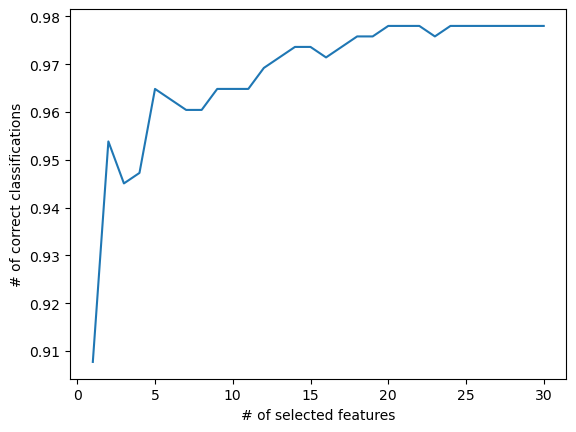

In [24]:
# for the training dataData 
# scale data using standard scalar
scaler = StandardScaler() #
val = scaler.fit_transform(trainData)
# perform logistic regression
estimator = LogisticRegression()
rfecv = RFECV(estimator, cv=5)
rfecv.fit(trainData, trainResults)
chosenFeatures = np.arange(trainData.shape[1])[rfecv.support_]
print("The Chosen Select Features are ", df.iloc[0][chosenFeatures])

plt.figure()
plt.xlabel("# of selected features")
plt.ylabel("# of correct classifications")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
plt.show()



This block will run PCA on the training and test data 

In [25]:
pca = PCA(svd_solver='full', copy=False)
pca.fit(trainData, trainResults) # train results is ignored.
# print(pca.explained_variance_ratio_) # percentage of variance explained be each component
# print(pca.singular_values_) # Singular values corresponding to each of teh selected components
print("The eigen values of the data is \n", pca.explained_variance_) # eigen values of the data.
# print(pca.components_) # Eigen Vectors

The eigen values of the data is 
 [1.34185392e+01 5.64046818e+00 2.96541397e+00 1.79726323e+00
 1.66018802e+00 1.18471800e+00 6.72563056e-01 4.68169183e-01
 4.19865590e-01 3.47916113e-01 3.15488007e-01 2.78534087e-01
 2.38761209e-01 1.57118007e-01 9.47407848e-02 7.96349865e-02
 6.23444657e-02 5.54679634e-02 4.53945510e-02 3.30048238e-02
 2.96238238e-02 2.77975879e-02 2.09208325e-02 1.88132397e-02
 1.61293557e-02 7.88857662e-03 6.74437196e-03 1.61084862e-03
 8.22289078e-04 1.34948867e-04]


Kept  7  features
[0.4463016  0.18760238 0.09862989 0.05977711 0.05521798 0.03940381
 0.0223695 ]
['radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']
[ 1.07359196 -2.11106712  1.24905017  0.97020478  1.60274652  3.20772775
  2.58769143  2.47290812  2.12099691  2.29933552  2.53015298 -0.5569948
  2.88010453  2.67591635 -0.19881568  1.24776544  0.66520392  0.63245388
  1.04401351  0.86203561  1.84888728 -1.33755015  2.27738301  1.98406477
  1.28963327  2.51113135  2.04613575  2.21913915  2.57726114  1.89562148]
             

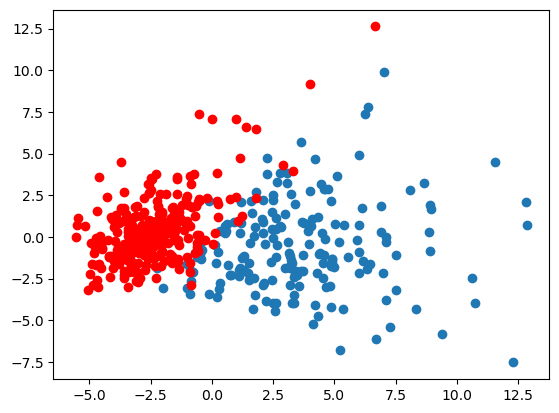

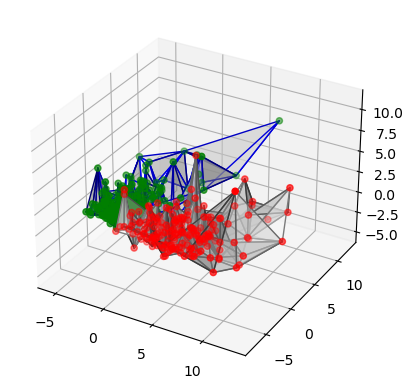

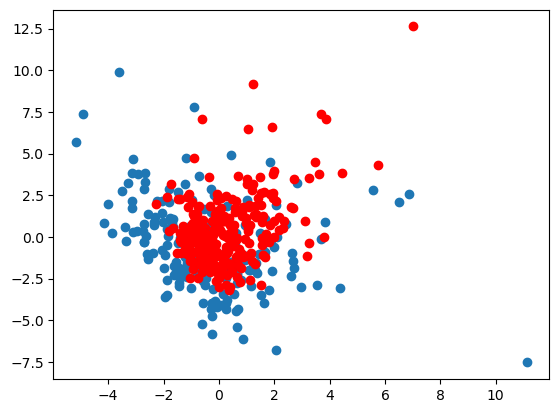

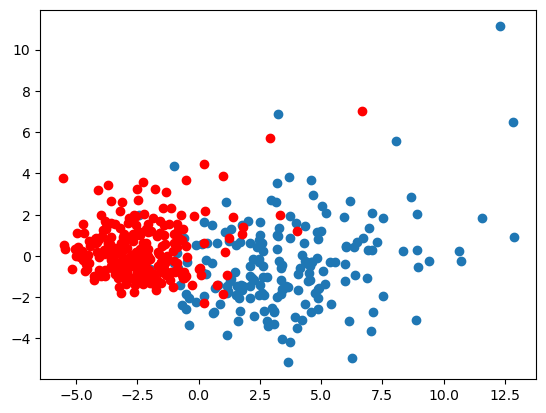

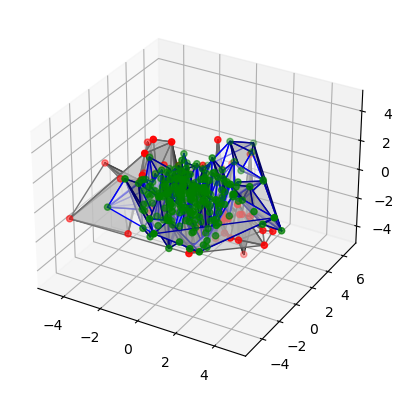

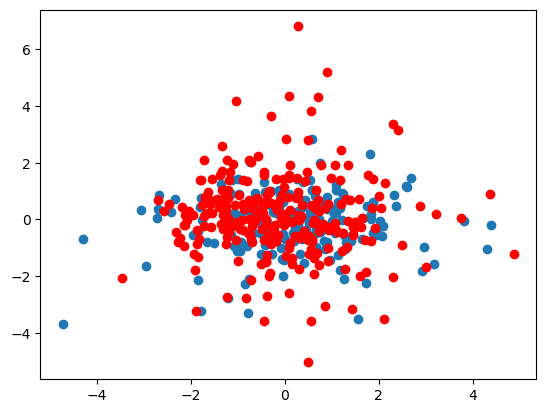

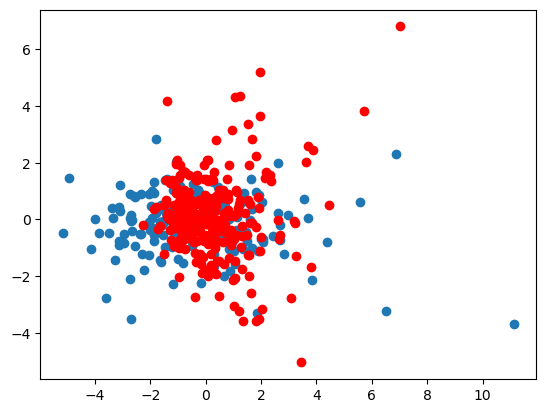

In [46]:
minEigenValue = pca.explained_variance_[0] * 0.05 # Keeps top 95% of variances
componentsKept = len(pca.explained_variance_[pca.explained_variance_ > minEigenValue])
print("Kept ", componentsKept, " features")
# components = 5
pcaTrain = PCA(n_components=components) # Creates a new pca to reduce feature set to only features with eigen values above minEigenValue
pcaTrainData = pcaTrain.fit(trainData, trainResults).transform(trainData) # Train results is ignored
pcaTestData = pcaTrain.transform(testData)
print(pcaTrain.explained_variance_ratio_)
print(df.columns.values[2:32])

loadings = pd.DataFrame(pcaTrain.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index=df.columns.values[2:32])
print(trainData[0])
print(loadings)
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(pcaTrainData[trainResults==1][:,0], pcaTrainData[trainResults==1][:,1])
ax3.scatter(pcaTrainData[trainResults==0][:,0], pcaTrainData[trainResults==0][:,1],c="red")
if components > 2:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(pcaTrainData[trainResults==1][:,0],pcaTrainData[trainResults==1][:,1],pcaTrainData[trainResults==1][:,2],edgecolors='grey',color='white',alpha=0.5)
    ax.plot_trisurf(pcaTrainData[trainResults==0][:,0],pcaTrainData[trainResults==0][:,1],pcaTrainData[trainResults==0][:,2],edgecolors='blue',color='white',alpha=0.5)
    ax.scatter(pcaTrainData[trainResults==1][:,0],pcaTrainData[trainResults==1][:,1],pcaTrainData[trainResults==1][:,2],c='red')
    ax.scatter(pcaTrainData[trainResults==0][:,0],pcaTrainData[trainResults==0][:,1],pcaTrainData[trainResults==0][:,2],c='green')
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.scatter(pcaTrainData[trainResults==1][:,2], pcaTrainData[trainResults==1][:,1])
    ax1.scatter(pcaTrainData[trainResults==0][:,2], pcaTrainData[trainResults==0][:,1],c="red")
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ax2.scatter(pcaTrainData[trainResults==1][:,0], pcaTrainData[trainResults==1][:,2])
    ax2.scatter(pcaTrainData[trainResults==0][:,0], pcaTrainData[trainResults==0][:,2],c="red")
if components > 4:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(pcaTrainData[trainResults==1][:,3],pcaTrainData[trainResults==1][:,4],pcaTrainData[trainResults==1][:,5],edgecolors='grey',color='white',alpha=0.5)
    ax.plot_trisurf(pcaTrainData[trainResults==0][:,3],pcaTrainData[trainResults==0][:,4],pcaTrainData[trainResults==0][:,5],edgecolors='blue',color='white',alpha=0.5)
    ax.scatter(pcaTrainData[trainResults==1][:,3],pcaTrainData[trainResults==1][:,4],pcaTrainData[trainResults==1][:,5],c='red')
    ax.scatter(pcaTrainData[trainResults==0][:,3],pcaTrainData[trainResults==0][:,4],pcaTrainData[trainResults==0][:,5],c='green')

    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.scatter(pcaTrainData[trainResults==1][:,3], pcaTrainData[trainResults==1][:,4])
    ax1.scatter(pcaTrainData[trainResults==0][:,3], pcaTrainData[trainResults==0][:,4],c="red")
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ax2.scatter(pcaTrainData[trainResults==1][:,2], pcaTrainData[trainResults==1][:,4])
    ax2.scatter(pcaTrainData[trainResults==0][:,2], pcaTrainData[trainResults==0][:,4],c="red")

# 

print(np.shape(trainData))
print(np.shape(testData))

Block will implement linear regression.

In [47]:
reg = LinearRegression().fit(pcaTrainData, trainResults)
predictTrain = reg.predict(pcaTrainData)
bestRmse = 1
bestI = 0
for i in range(300, 700):
    predictTrainTest = predictTrain > (i / 1000)
    predictTrainTest = predictTrainTest * 1
    rmse = (mean_squared_error(trainResults, predictTrainTest))
    if rmse < bestRmse:
        bestRmse = rmse
        bestI = i


print(bestI)
print(bestRmse)
threshold = bestI / 1000
predict = reg.predict(pcaTestData)
results = predict > threshold
results = results * 1
print(results == testResults)
print(mean_squared_error(testResults, results))
print("Coefficients: ", reg.coef_)







462
0.024175824175824177
[ True False  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True False  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
0.05263157894736842
Coefficients:  [ 0.10597162 -0.04300645 -0.05273378  0.03757196 -0.03638364 -0.01939274
 -0.04197773]
